In [1]:
!pip install matplotlib pandas plotly ipywidgets
# !pip install 


In [ ]:
import pandas as pd

df = pd.read_csv("liverpool_vs_tottenham_events.csv")

df.head()


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,type,under_pressure,type.name,team.name,player.name,pass.end_location,shot.statsbomb_xg,shot.outcome.name,location.x,location.y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Starting XI,NaN,NaN,Tottenham Hotspur,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Starting XI,NaN,NaN,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Start,NaN,NaN,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Start,NaN,NaN,Tottenham Hotspur,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Half Start,NaN,NaN,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_game = df.iloc[8:].copy()

df_game = df_game[df_game['location.x'].notna() & df_game['location.y'].notna()]

df_game.reset_index(drop=True, inplace=True)

print(df_game['type'].unique())


['Pass' 'Ball Receipt*' 'Carry' 'Duel' 'Pressure' 'Foul Committed' 'Shot'
 'Goal Keeper' 'Clearance' 'Ball Recovery' 'Foul Won' 'Interception'
 'Miscontrol' 'Dispossessed' 'Dribbled Past' 'Dribble' '50/50' 'Block'
 'Shield' 'Referee Ball-Drop' 'Offside']


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot([0, 0], [0, 80], color="black")
    ax.plot([0, 120], [80, 80], color="black")
    ax.plot([120, 120], [80, 0], color="black")
    ax.plot([120, 0], [0, 0], color="black")
    ax.plot([60, 60], [0, 80], color="black")

    ax.plot([18, 18], [62, 18], color="black")
    ax.plot([0, 18], [62, 62], color="black")
    ax.plot([18, 0], [18, 18], color="black")

    ax.plot([120, 102], [62, 62], color="black")
    ax.plot([102, 102], [62, 18], color="black")
    ax.plot([102, 120], [18, 18], color="black")

    centre_circle = plt.Circle((60, 40), 10, color="black", fill=False)
    ax.add_patch(centre_circle)

    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.axis('off')
    return ax


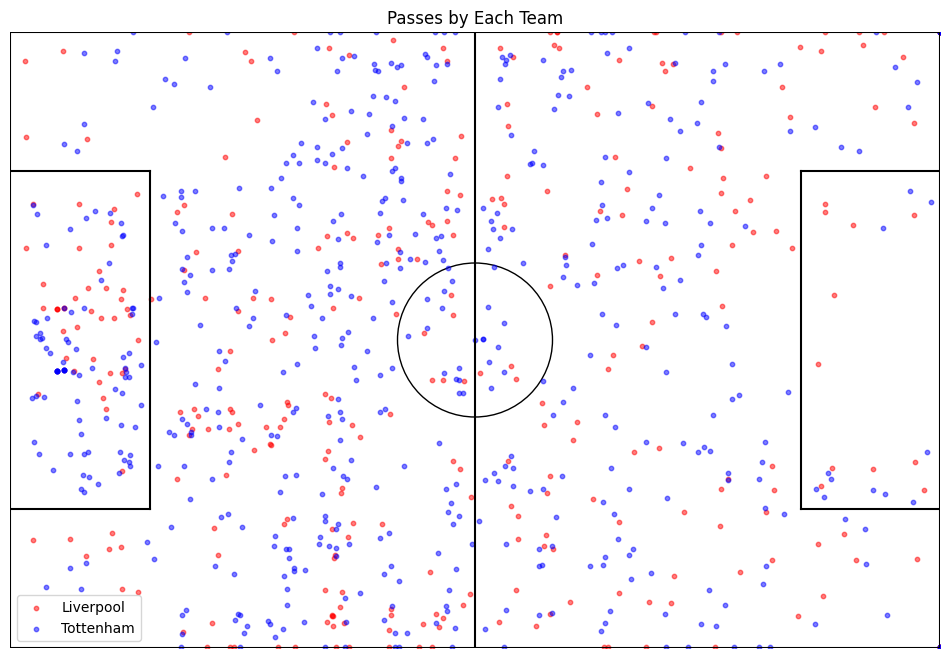

In [ ]:
df_passes = df_game[df_game['type'] == 'Pass']


ax = draw_pitch()

# Liverpool = red
df_liv = df_passes[df_passes['team.name'] == 'Liverpool']
ax.scatter(df_liv['location.x'], df_liv['location.y'], color='red', s=10, alpha=0.5, label='Liverpool')

# Tottenham = blue
df_tot = df_passes[df_passes['team.name'] == 'Tottenham Hotspur']
ax.scatter(df_tot['location.x'], df_tot['location.y'], color='blue', s=10, alpha=0.5, label='Tottenham')

plt.legend()
plt.title("Passes by Each Team")
plt.show()


In [ ]:
player_name = "Mohamed Salah"
df_vvd = df_passes[df_passes['player'] == player_name].copy()

def parse_end_location(value):
    if isinstance(value, str):
        try:
            parsed = eval(value)
            if isinstance(parsed, (list, tuple)) and len(parsed) == 2:
                return parsed
        except:
            pass
    return [None, None]

end_locations = df_vvd['pass_end_location'].apply(parse_end_location)
end_locations_df = pd.DataFrame(end_locations.tolist(), columns=['end_x', 'end_y'])

df_vvd = pd.concat([df_vvd.reset_index(drop=True), end_locations_df], axis=1)

df_vvd.dropna(subset=['location.x', 'location.y', 'end_x', 'end_y'], inplace=True)


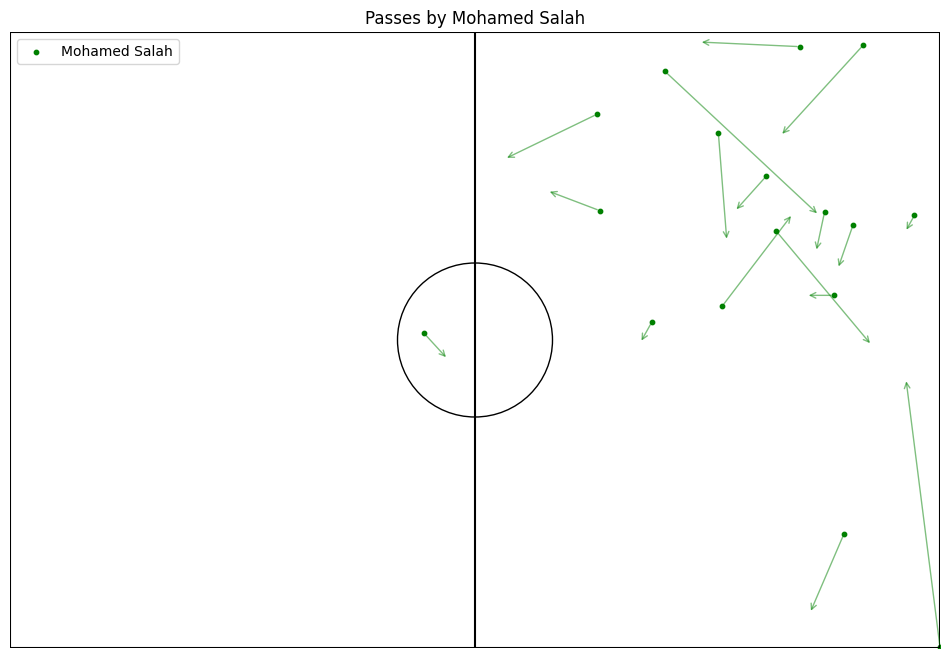

In [ ]:
#  pitch and arrows
ax = draw_pitch()
for _, row in df_vvd.iterrows():
    ax.annotate(
        '', 
        xy=(row['end_x'], row['end_y']), 
        xytext=(row['location.x'], row['location.y']),
        arrowprops=dict(arrowstyle='->', color='green', alpha=0.5)
    )

ax.scatter(df_vvd['location.x'], df_vvd['location.y'], color='green', s=10, label=player_name)
plt.legend()
plt.title(f"Passes by {player_name}")
plt.show()


In [ ]:
recipients = df_vvd['pass_recipient'].value_counts()
print(" Pass Recipients:\n", recipients)

avg_length = df_vvd['pass_length'].mean()
print(f"\n Average Pass Length: {avg_length:.2f} meters")

body_part_counts = df_vvd['pass_body_part'].value_counts()
print("\nPass Body Part Counts:\n", body_part_counts)

height_counts = df_vvd['pass_height'].value_counts()
print("\n Pass Height Counts:\n", height_counts)


🎯 Pass Recipients:
 pass_recipient
Sadio Mané                             4
Roberto Firmino Barbosa de Oliveira    3
Trent Alexander-Arnold                 2
Jordan Brian Henderson                 2
James Philip Milner                    2
Divock Okoth Origi                     2
Georginio Wijnaldum                    1
Name: count, dtype: int64

📏 Average Pass Length: 11.94 meters

🦵 Pass Body Part Counts:
 pass_body_part
Left Foot     15
Right Foot     2
Name: count, dtype: int64

📐 Pass Height Counts:
 pass_height
Ground Pass    9
High Pass      5
Low Pass       3
Name: count, dtype: int64


In [19]:
# !pip install google-generativeai


In [ ]:
import pandas as pd

player_name = "Mohamed Salah"
df_vvd = df_passes[df_passes['player'] == player_name].copy()

def parse_end_location(value):
    if isinstance(value, str):
        try:
            parsed = eval(value)
            if isinstance(parsed, (list, tuple)) and len(parsed) == 2:
                return parsed
        except:
            pass
    return [None, None]

end_locations = df_vvd['pass_end_location'].apply(parse_end_location)
end_locations_df = pd.DataFrame(end_locations.tolist(), columns=['end_x', 'end_y'])

df_vvd = pd.concat([df_vvd.reset_index(drop=True), end_locations_df], axis=1)
df_vvd.dropna(subset=['location.x', 'location.y', 'end_x', 'end_y'], inplace=True)

df_vvd['half'] = df_vvd['minute'].apply(lambda x: 1 if x < 45 else 2)

summary = {
    "player": player_name,
    "total_passes": len(df_vvd),
    "average_pass_length": round(df_vvd['pass_length'].mean(), 2),
    "under_pressure_passes": int(df_vvd['under_pressure'].sum()),
    "pass_recipients": df_vvd['pass_recipient'].value_counts().to_dict(),
    "pass_body_part": df_vvd['pass_body_part'].value_counts().to_dict(),
    "pass_height": df_vvd['pass_height'].value_counts().to_dict(),
}

passes_df = df_vvd[['minute', 'half', 'under_pressure', 'location.x', 'location.y', 'end_x', 'end_y', 'pass_recipient', 'pass_length']].copy()
passes_df.rename(columns={'location.x': 'start_x', 'location.y': 'start_y'}, inplace=True)
passes_df = passes_df.round(1)
pass_table_str = passes_df.to_string(index=False)

text_summary = f"""
Player: {player_name}
Total passes: {summary['total_passes']}
Average pass length: {summary['average_pass_length']} meters
Under-pressure passes: {summary['under_pressure_passes']}

Pass Recipients:
{pd.Series(summary['pass_recipients']).to_string()}

Body Parts Used:
{pd.Series(summary['pass_body_part']).to_string()}

Pass Heights:
{pd.Series(summary['pass_height']).to_string()}

Detailed Pass Table:
(minute, half, under_pressure, start_x, start_y ➝ end_x, end_y) with recipient and length

{pass_table_str}
"""


In [ ]:
import google.generativeai as genai

genai.configure(api_key="")

model = genai.GenerativeModel("gemini-1.5-flash")

prompt = f"""
Here is a detailed passing report for Mohamed Salah during the UCL Final.

{text_summary}

Please analyze and interpret this data with a focus on:

1. Temporal trends — Did his passing style change between the first and second half? Any change in pass lengths or directions?
2. Pressure — What behavior differences are observed between under-pressure and non-pressured passes?
3. Tactical interpretation — What does this say about his role, confidence, and style of distribution?
4. Key patterns or standout phases — Are there clusters of passes to specific zones or players?

Use this data to generate an in-depth tactical narrative.
"""

response = model.generate_content(prompt)
print(response.text)

## Tactical Analysis of Mohamed Salah's Passing in the UCL Final

This analysis examines Mohamed Salah's passing data from the UCL final, revealing insights into his role, decision-making, and tactical influence within the team.

**1. Temporal Trends:**

A cursory glance suggests a subtle shift in Salah's passing strategy between halves.  In the **first half**, he attempted longer passes, with a higher proportion directed towards the central attacking area (Roberto Firmino and the central midfielders).  Noteworthy is the 35.2-meter pass to Mane in the 42nd minute, a significant risk-reward attempt.  The average pass length in the first half is higher than the overall average.

The **second half** shows a decrease in average pass length.  His passes become more compact and focused on maintaining possession, particularly near the halfway line and in the opponent's half.  The longer passes become less frequent, and there's a greater emphasis on shorter, safer passes to teammates in close 

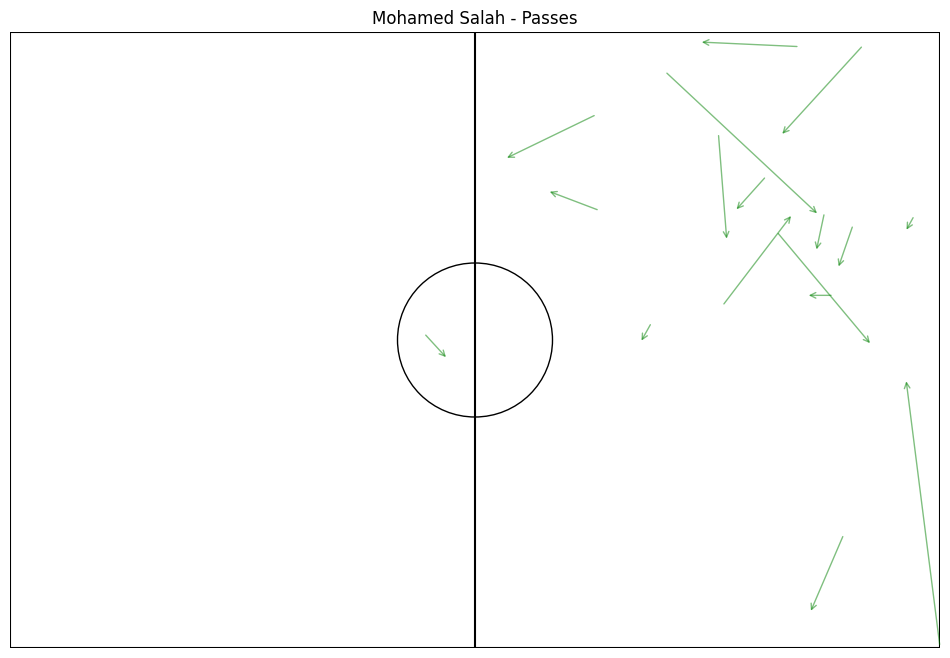

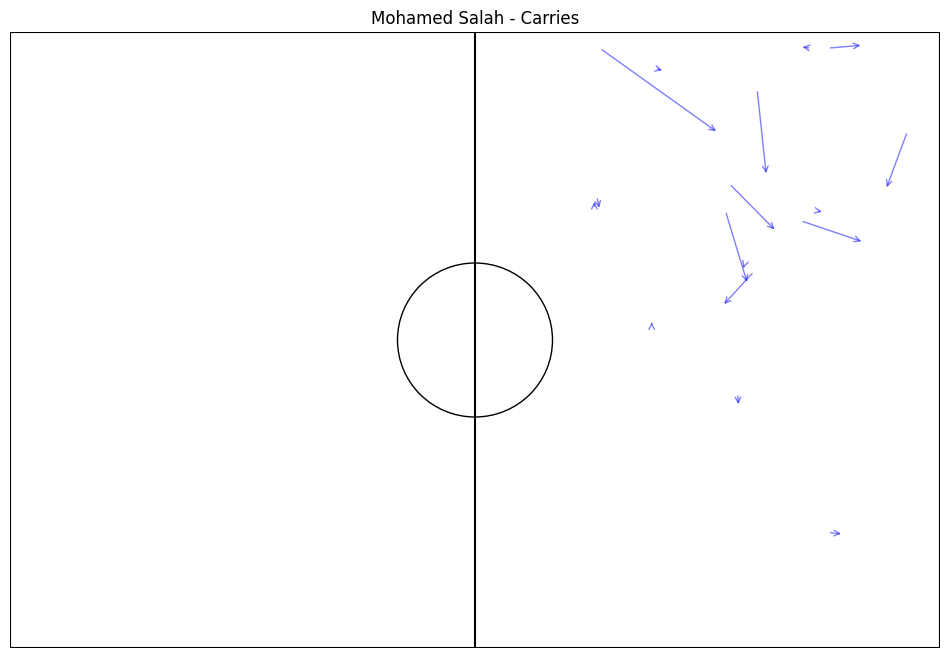

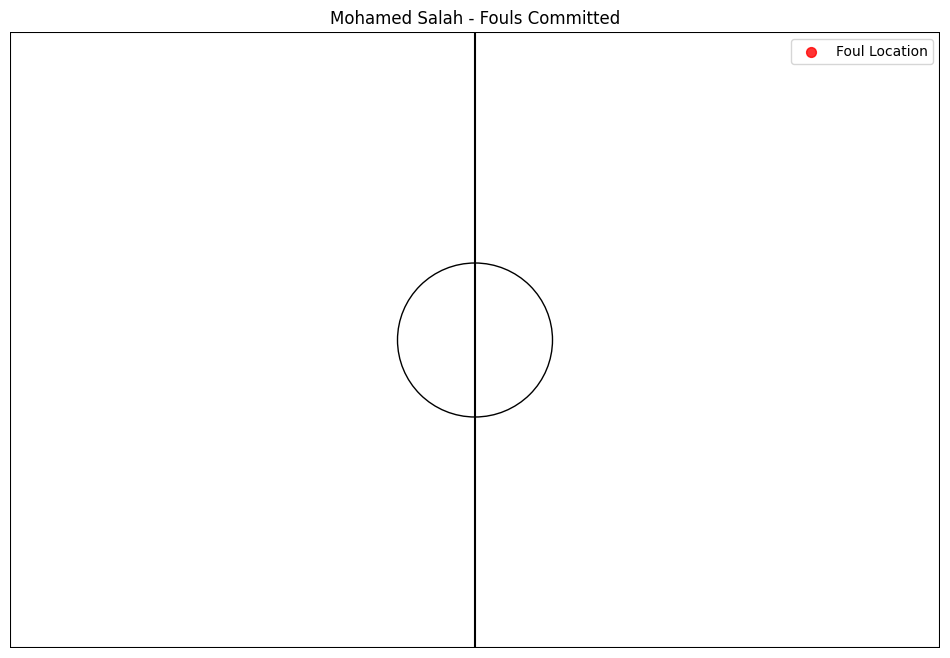

⏱️ Average carry duration: 1.62 seconds
         timestamp  duration
1775  00:06:00.420  1.177227
1906  00:20:24.928  3.079179
1908  00:20:29.623  1.461709
1909  00:21:50.964  2.417327
1958  00:29:01.323  0.039993


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

player = "Mohamed Salah"
df_player = df[df['player'] == player].copy()

def parse_location(value):
    if isinstance(value, str):
        try:
            parsed = eval(value)
            if isinstance(parsed, (list, tuple)) and len(parsed) == 2:
                return parsed
        except:
            pass
    return [None, None]

df_player[['pass_end_x', 'pass_end_y']] = df_player['pass_end_location'].apply(parse_location).apply(pd.Series)

df_player[['carry_end_x', 'carry_end_y']] = df_player['carry_end_location'].apply(parse_location).apply(pd.Series)

df_player = df_player[df_player['location.x'].notna() & df_player['location.y'].notna()]

def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_facecolor('white')
    ax.axis('off')

    ax.plot([0, 0], [0, 80], color="black")
    ax.plot([0, 120], [80, 80], color="black")
    ax.plot([120, 120], [80, 0], color="black")
    ax.plot([120, 0], [0, 0], color="black")
    ax.plot([60, 60], [0, 80], color="black")
    ax.add_patch(plt.Circle((60, 40), 10, color='black', fill=False))

    return ax

df_pass = df_player[df_player['type'] == 'Pass'].dropna(subset=['pass_end_x', 'pass_end_y'])

ax = draw_pitch()
for _, row in df_pass.iterrows():
    ax.annotate(
        '',
        xy=(row['pass_end_x'], row['pass_end_y']),
        xytext=(row['location.x'], row['location.y']),
        arrowprops=dict(arrowstyle='->', color='green', alpha=0.5)
    )
plt.title(f"{player} - Passes")
plt.show()

df_carry = df_player[df_player['type'] == 'Carry'].dropna(subset=['carry_end_x', 'carry_end_y'])

ax = draw_pitch()
for _, row in df_carry.iterrows():
    ax.annotate(
        '',
        xy=(row['carry_end_x'], row['carry_end_y']),
        xytext=(row['location.x'], row['location.y']),
        arrowprops=dict(arrowstyle='->', color='blue', alpha=0.5)
    )
plt.title(f"{player} - Carries")
plt.show()

df_foul = df_player[df_player['type'] == 'Foul Committed']

ax = draw_pitch()
ax.scatter(df_foul['location.x'], df_foul['location.y'], color='red', s=50, alpha=0.8, label='Foul Location')
plt.legend()
plt.title(f"{player} - Fouls Committed")
plt.show()

avg_carry_time = df_carry['duration'].mean()
print(f" Average carry duration: {avg_carry_time:.2f} seconds")

print(df_carry[['timestamp', 'duration']].head())


In [32]:
print(df_player['type'].value_counts())


type
Ball Receipt*    52
Pressure         34
Carry            19
Pass             17
Shot              6
Ball Recovery     4
Miscontrol        3
Duel              1
Dispossessed      1
Block             1
Name: count, dtype: int64


In [33]:
df_carry_debug = df[df['player'] == "Mohamed Salah"]
df_carry_debug = df_carry_debug[df_carry_debug['type'] == 'Carry']
print(df_carry_debug[['timestamp', 'location', 'carry_end_location']])

         timestamp       location carry_end_location
1775  00:06:00.420  [104.0, 56.8]      [105.1, 56.6]
1906  00:20:24.928   [76.1, 77.9]       [91.4, 66.9]
1908  00:20:29.623   [92.3, 56.8]       [95.2, 47.2]
1909  00:21:50.964  [115.8, 67.1]      [113.0, 59.5]
1958  00:29:01.323   [82.8, 42.1]       [82.8, 42.3]
1980  00:31:00.251   [83.2, 75.3]       [84.5, 74.9]
2032  00:36:52.391  [105.5, 77.9]      [110.1, 78.3]
2034  00:36:59.269  [103.4, 77.9]      [101.9, 78.1]
2039  00:40:20.030   [75.7, 58.7]       [76.1, 56.8]
2044  00:40:41.845  [105.5, 15.0]      [107.6, 14.8]
2053  00:41:49.668   [93.9, 33.1]       [94.0, 31.3]
2081  00:45:49.346   [75.4, 57.0]       [75.4, 58.3]
2159  00:08:03.435  [102.0, 55.5]      [110.2, 52.7]
2160  00:08:10.306   [94.8, 49.9]       [94.5, 49.0]
2214  00:17:02.407  [108.8, 55.0]      [108.8, 55.0]
2234  00:18:39.093   [98.9, 76.0]       [98.9, 76.0]
2310  00:29:41.064   [92.8, 60.3]       [98.9, 54.1]
2369  00:36:48.709   [96.0, 48.9]       [91.9,

✅ Mohamed Salah total valid carries: 19


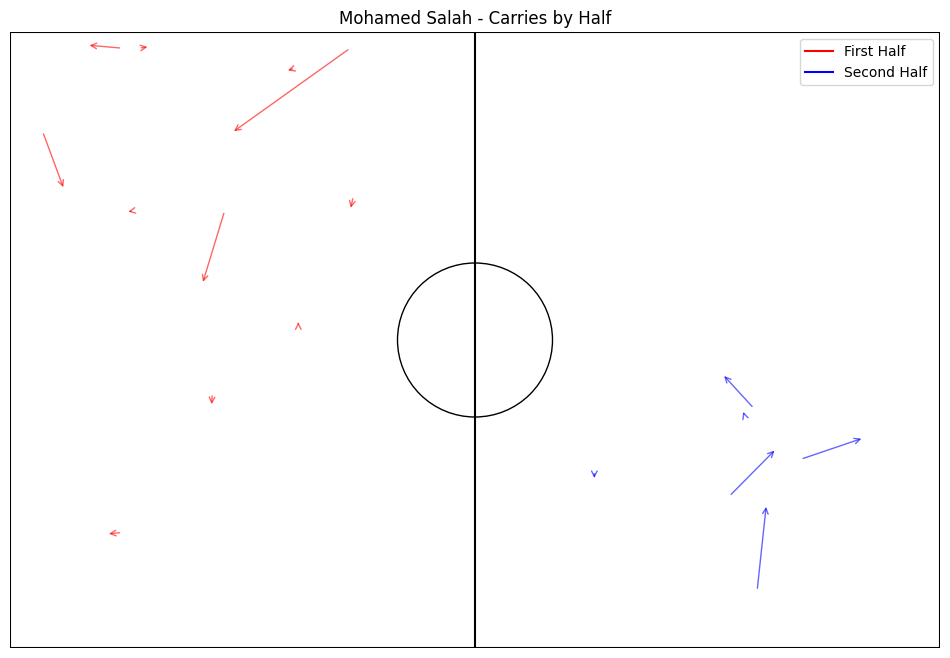

📏 Average carry length: 4.67 meters


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

def safe_parse_location(value):
    try:
        parsed = ast.literal_eval(value) if isinstance(value, str) else value
        if isinstance(parsed, (list, tuple)) and len(parsed) == 2:
            return parsed
    except:
        pass
    return [None, None]

player = "Mohamed Salah"
df_player = df[df['player'] == player].copy()

df_player[['location_x', 'location_y']] = df_player['location'].apply(safe_parse_location).apply(pd.Series)
df_player[['carry_end_x', 'carry_end_y']] = df_player['carry_end_location'].apply(safe_parse_location).apply(pd.Series)

df_carry = df_player[
    (df_player['type'] == 'Carry') &
    df_player['location_x'].notna() & df_player['location_y'].notna() &
    df_player['carry_end_x'].notna() & df_player['carry_end_y'].notna()
].copy()

df_carry['half'] = df_carry['minute'].apply(lambda x: 1 if x < 45 else 2)

df_carry.loc[df_carry['half'] == 1, 'location_x'] = 120 - df_carry.loc[df_carry['half'] == 1, 'location_x']
df_carry.loc[df_carry['half'] == 1, 'carry_end_x'] = 120 - df_carry.loc[df_carry['half'] == 1, 'carry_end_x']
df_carry.loc[df_carry['half'] == 2, 'location_y'] = 80 - df_carry.loc[df_carry['half'] == 2, 'location_y']
df_carry.loc[df_carry['half'] == 2, 'carry_end_y'] = 80 - df_carry.loc[df_carry['half'] == 2, 'carry_end_y']


print(f" Mohamed Salah total valid carries: {len(df_carry)}")

def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_facecolor('white')
    ax.axis('off')
    ax.plot([0, 0], [0, 80], color="black")
    ax.plot([0, 120], [80, 80], color="black")
    ax.plot([120, 120], [80, 0], color="black")
    ax.plot([120, 0], [0, 0], color="black")
    ax.plot([60, 60], [0, 80], color="black")
    ax.add_patch(plt.Circle((60, 40), 10, color='black', fill=False))
    return ax

ax = draw_pitch()
colors = {1: 'red', 2: 'blue'}

for _, row in df_carry.iterrows():
    ax.annotate(
        '',
        xy=(row['carry_end_x'], row['carry_end_y']),
        xytext=(row['location_x'], row['location_y']),
        arrowprops=dict(arrowstyle='->', color=colors[row['half']], alpha=0.6)
    )

ax.plot([], [], color='red', label='First Half')
ax.plot([], [], color='blue', label='Second Half')
ax.legend()

plt.title(f"{player} - Carries by Half")
plt.show()

carry_lengths = np.sqrt((df_carry['carry_end_x'] - df_carry['location_x'])**2 +
                        (df_carry['carry_end_y'] - df_carry['location_y'])**2)
avg_length = carry_lengths.mean()
print(f" Average carry length: {avg_length:.2f} meters")


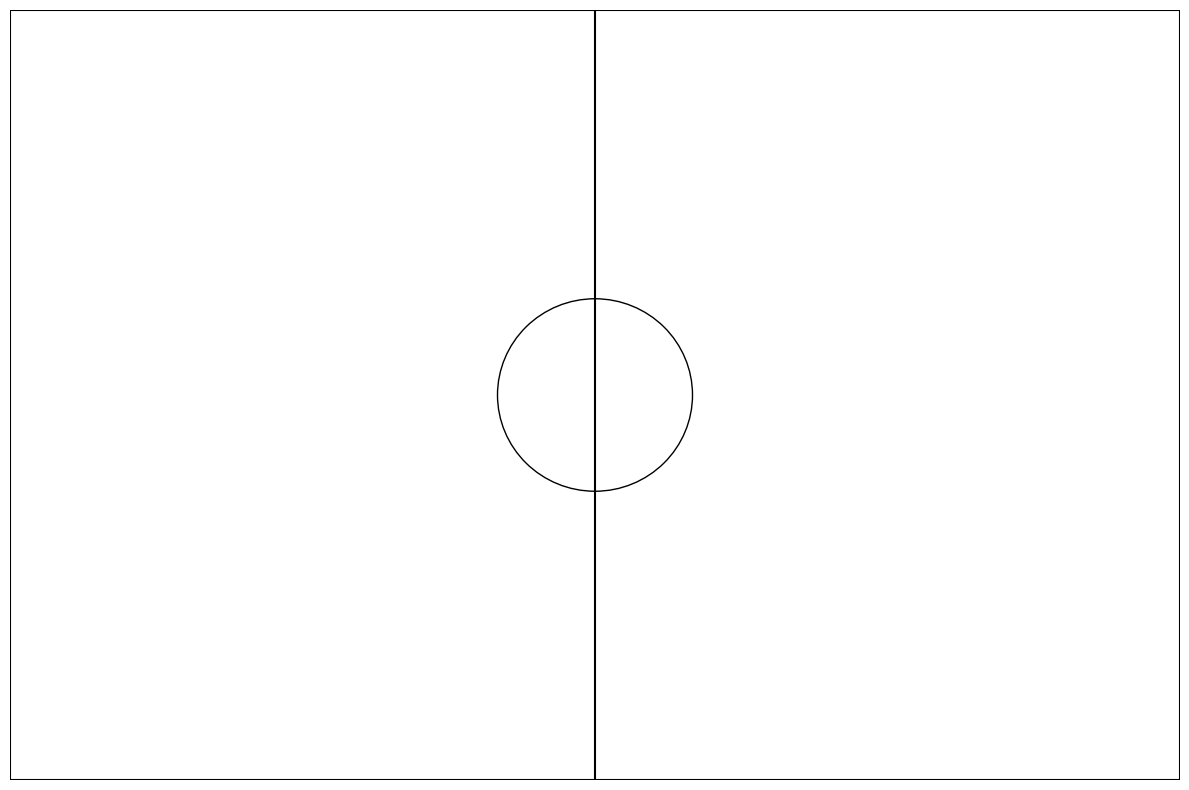

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ast

def safe_parse_location(value):
    try:
        parsed = ast.literal_eval(value) if isinstance(value, str) else value
        if isinstance(parsed, (list, tuple)) and len(parsed) == 2:
            return parsed
    except:
        pass
    return [None, None]

player = "Mohamed Salah"
df_player = df[df['player'] == player].copy()
df_player[['location_x', 'location_y']] = df_player['location'].apply(safe_parse_location).apply(pd.Series)
df_player[['carry_end_x', 'carry_end_y']] = df_player['carry_end_location'].apply(safe_parse_location).apply(pd.Series)

df_carry = df_player[
    (df_player['type'] == 'Carry') &
    df_player['location_x'].notna() & df_player['location_y'].notna() &
    df_player['carry_end_x'].notna() & df_player['carry_end_y'].notna()
].copy()

df_carry['half'] = df_carry['minute'].apply(lambda x: 1 if x < 45 else 2)
df_carry.loc[df_carry['half'] == 1, 'location_x'] = 120 - df_carry.loc[df_carry['half'] == 1, 'location_x']
df_carry.loc[df_carry['half'] == 1, 'carry_end_x'] = 120 - df_carry.loc[df_carry['half'] == 1, 'carry_end_x']
df_carry.loc[df_carry['half'] == 2, 'location_y'] = 80 - df_carry.loc[df_carry['half'] == 2, 'location_y']
df_carry.loc[df_carry['half'] == 2, 'carry_end_y'] = 80 - df_carry.loc[df_carry['half'] == 2, 'carry_end_y']

df_carry = df_carry.sort_values(by='timestamp').reset_index(drop=True)

def draw_pitch(ax):
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_facecolor('white')
    ax.axis('off')
    ax.plot([0, 0], [0, 80], color="black")
    ax.plot([0, 120], [80, 80], color="black")
    ax.plot([120, 120], [80, 0], color="black")
    ax.plot([120, 0], [0, 0], color="black")
    ax.plot([60, 60], [0, 80], color="black")
    ax.add_patch(plt.Circle((60, 40), 10, color='black', fill=False))

fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

lines = []

def animate(i):
    row = df_carry.iloc[i]
    arrow = ax.annotate(
        '',
        xy=(row['carry_end_x'], row['carry_end_y']),
        xytext=(row['location_x'], row['location_y']),
        arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7, lw=2)
    )
    time = row['timestamp']
    ax.set_title(f"{player} - Carry {i+1}/{len(df_carry)}   Time: {time}", fontsize=16)
    lines.append(arrow)
    return lines

ani = animation.FuncAnimation(fig, animate, frames=len(df_carry), interval=700, repeat=False)

plt.tight_layout()
plt.show()

ani.save('salah_carries.gif', writer='pillow', fps=1)
# ani.save('salah_carries.mp4', writer='ffmpeg', fps=1)


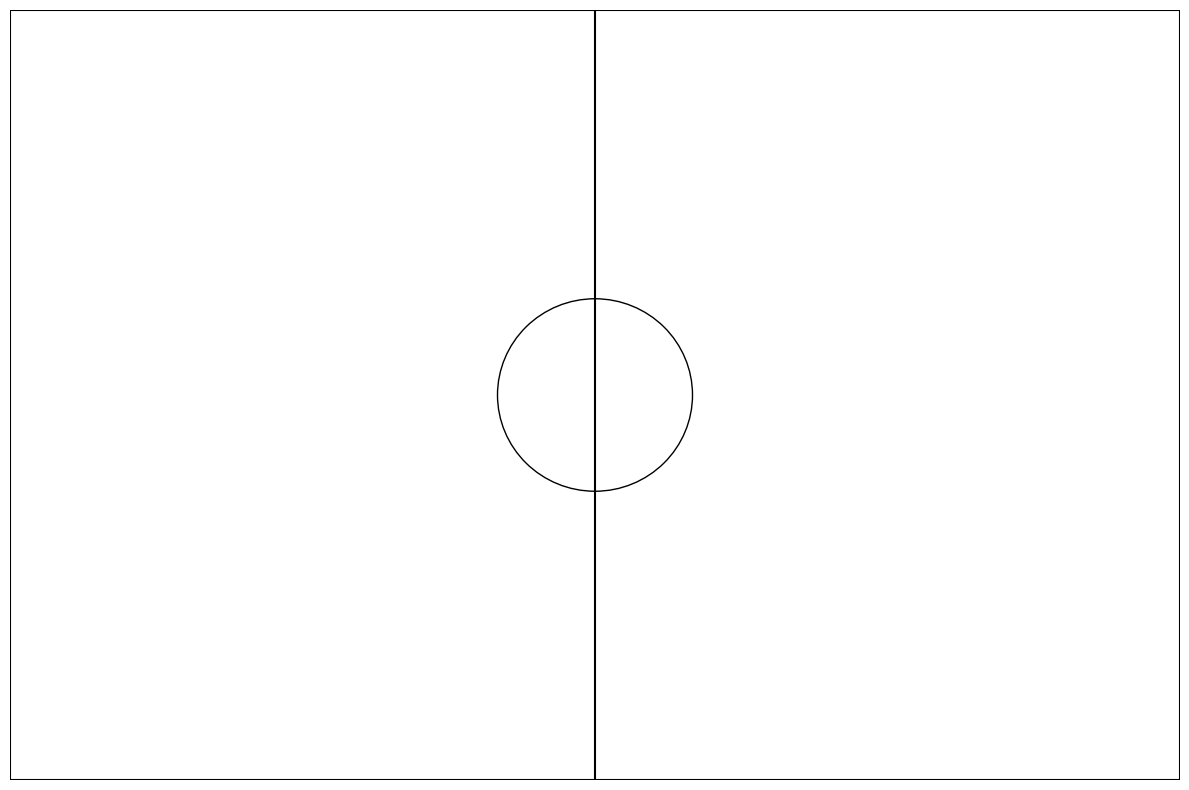

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ast

def safe_parse_location(value):
    try:
        parsed = ast.literal_eval(value) if isinstance(value, str) else value
        if isinstance(parsed, (list, tuple)) and len(parsed) == 2:
            return parsed
    except:
        pass
    return [None, None]

player = "Mohamed Salah"
df_player = df[df['player'] == player].copy()

df_player[['location_x', 'location_y']] = df_player['location'].apply(safe_parse_location).apply(pd.Series)
df_player[['carry_end_x', 'carry_end_y']] = df_player['carry_end_location'].apply(safe_parse_location).apply(pd.Series)

df_carry = df_player[
    (df_player['type'] == 'Carry') &
    df_player['location_x'].notna() & df_player['location_y'].notna() &
    df_player['carry_end_x'].notna() & df_player['carry_end_y'].notna()
].copy()

df_carry['half'] = df_carry['minute'].apply(lambda x: 1 if x < 45 else 2)

df_carry.loc[df_carry['half'] == 1, 'location_x'] = 120 - df_carry.loc[df_carry['half'] == 1, 'location_x']
df_carry.loc[df_carry['half'] == 1, 'carry_end_x'] = 120 - df_carry.loc[df_carry['half'] == 1, 'carry_end_x']

df_carry.loc[df_carry['half'] == 2, 'location_y'] = 80 - df_carry.loc[df_carry['half'] == 2, 'location_y']
df_carry.loc[df_carry['half'] == 2, 'carry_end_y'] = 80 - df_carry.loc[df_carry['half'] == 2, 'carry_end_y']

df_carry = df_carry.sort_values(by=['minute', 'timestamp']).reset_index(drop=True)

def draw_pitch(ax):
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_facecolor('white')
    ax.axis('off')
    ax.plot([0, 0], [0, 80], color="black")
    ax.plot([0, 120], [80, 80], color="black")
    ax.plot([120, 120], [80, 0], color="black")
    ax.plot([120, 0], [0, 0], color="black")
    ax.plot([60, 60], [0, 80], color="black")
    ax.add_patch(plt.Circle((60, 40), 10, color='black', fill=False))

fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

lines = []

def animate(i):
    row = df_carry.iloc[i]
    arrow = ax.annotate(
        '',
        xy=(row['carry_end_x'], row['carry_end_y']),
        xytext=(row['location_x'], row['location_y']),
        arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7, lw=2)
    )
    ax.set_title(f"{player} - Carry {i+1}/{len(df_carry)}  |  Time: {row['minute']:02d}:{row['timestamp'][-6:]}", fontsize=16)
    lines.append(arrow)
    return lines

ani = animation.FuncAnimation(fig, animate, frames=len(df_carry), interval=700, repeat=False)

plt.tight_layout()
plt.show()


ani.save('salah_carries.gif', writer='pillow', fps=1)
# ani.save('salah_carries_corrected.mp4', writer='ffmpeg', fps=1)


Right, folks, let's dissect Mo Salah's performance tonight.  The numbers tell a story, and it's a fascinating one.

First off, those carry stats: 19 carries, averaging just under 5 meters, and a little over a second and a half per carry.  That's not exactly blazing through defenses, is it? This suggests a less explosive, more controlled approach than we sometimes see from him.  The eight carries under pressure highlight the fact that he was involved in tight situations, but we'll come back to how he managed those.

Looking at his passing, 17 attempts with an average length of nearly 12 meters suggests a player looking to be selective with his distribution, rather than just launching hopeful balls forward. The mix of pass heights – predominantly ground passes – and his favoured left foot speaks to a player who wants to retain control and build play patiently, picking his moments. His top recipients are telling – Mané, Firmino, and Trent – all indicative of a player working within the Li

In [4]:
!pip install statsbombpy


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached typeguard-4.4.2-py3-none-any.whl.metadata (3.8 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached typeguard-4.4.2-py3-none-any.whl (35 kB)


In [8]:
from statsbombpy import sb

comps = sb.competitions()
print(comps[['competition_id', 'season_id', 'competition_name', 'season_name']])


/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


    competition_id  season_id        competition_name season_name
0                9        281           1. Bundesliga   2023/2024
1                9         27           1. Bundesliga   2015/2016
2             1267        107  African Cup of Nations        2023
3               16          4        Champions League   2018/2019
4               16          1        Champions League   2017/2018
..             ...        ...                     ...         ...
69              55         43               UEFA Euro        2020
70              35         75      UEFA Europa League   1988/1989
71              53        106       UEFA Women's Euro        2022
72              72        107       Women's World Cup        2023
73              72         30       Women's World Cup        2019

[74 rows x 4 columns]


In [ ]:
from statsbombpy import sb
import pandas as pd

competitions = sb.competitions()

all_liverpool_matches = []

for _, comp in competitions.iterrows():
    comp_id = comp['competition_id']
    season_id = comp['season_id']
    try:
        matches = sb.matches(competition_id=comp_id, season_id=season_id)
        liv_matches = matches[(matches['home_team'] == 'Liverpool') | (matches['away_team'] == 'Liverpool')]
        if not liv_matches.empty:
            liv_matches['competition_name'] = comp['competition_name']
            liv_matches['season_name'] = comp['season_name']
            all_liverpool_matches.append(liv_matches)
    except Exception as e:
        print(f"⚠️ Error for comp {comp_id}, season {season_id}: {e}")

df_liv_all = pd.concat(all_liverpool_matches).reset_index(drop=True)

df_liv_all.to_csv("liverpool_all_matches.csv", index=False)
print(f"✅ Found {len(df_liv_all)} Liverpool matches.")
print(df_liv_all[['match_id', 'match_date', 'competition_name', 'season_name', 'home_team', 'away_team']].head())


/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/s

✅ Found 44 Liverpool matches.
   match_id  match_date  competition_name season_name             home_team  \
0     22912  2019-06-01  Champions League   2018/2019     Tottenham Hotspur   
1     18245  2018-05-26  Champions League   2017/2018           Real Madrid   
2   3750200  2007-05-23  Champions League   2006/2007              AC Milan   
3   2302764  2005-05-25  Champions League   2004/2005              AC Milan   
4   3754042  2016-05-15    Premier League   2015/2016  West Bromwich Albion   

   away_team  
0  Liverpool  
1  Liverpool  
2  Liverpool  
3  Liverpool  
4  Liverpool  


In [10]:
!pip install statsbombpy pandas

In [ ]:
import os
import pandas as pd
from statsbombpy import sb
from tqdm import tqdm

df_liv_all = pd.read_csv("liverpool_all_matches.csv")

os.makedirs("matches", exist_ok=True)

for idx, row in tqdm(df_liv_all.iterrows(), total=len(df_liv_all), desc="Saving match CSVs"):
    match_id = row['match_id']
    try:
        events = sb.events(match_id=match_id)
        filename = f"matches/{match_id}_{row['home_team']}_vs_{row['away_team']}.csv"
        events.to_csv(filename.replace(" ", "_"), index=False)
    except Exception as e:
        print(f"⚠️ Could not fetch match {match_id}: {e}")


Saving match CSVs:   0%|          | 0/44 [00:00<?, ?it/s]/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
Saving match CSVs:   2%|▏         | 1/44 [00:00<00:36,  1.18it/s]/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
Saving match CSVs:   5%|▍         | 2/44 [00:01<00:31,  1.32it/s]/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
Saving match CSVs:   7%|▋         | 3/44 [00:02<00:30,  1.34it/s]/Users/saurabhsingh/Desktop/football/.conda/lib/python3.10/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.wa

In [ ]:
import pandas as pd

df_liv_all = pd.read_csv("liverpool_all_matches.csv")

for _, row in df_liv_all.iterrows():
    match_date = row['match_date']
    home = row['home_team']
    away = row['away_team']
    print(f"📅 {match_date} — {home} vs {away}")


📅 2019-06-01 — Tottenham Hotspur vs Liverpool
📅 2018-05-26 — Real Madrid vs Liverpool
📅 2007-05-23 — AC Milan vs Liverpool
📅 2005-05-25 — AC Milan vs Liverpool
📅 2016-05-15 — West Bromwich Albion vs Liverpool
📅 2016-05-11 — Liverpool vs Chelsea
📅 2015-12-30 — Sunderland vs Liverpool
📅 2015-12-13 — Liverpool vs West Bromwich Albion
📅 2015-08-29 — Liverpool vs West Ham United
📅 2015-09-20 — Liverpool vs Norwich City
📅 2015-10-04 — Everton vs Liverpool
📅 2015-11-29 — Liverpool vs Swansea City
📅 2015-12-20 — Watford vs Liverpool
📅 2015-10-31 — Chelsea vs Liverpool
📅 2015-12-06 — Newcastle United vs Liverpool
📅 2015-10-17 — Tottenham Hotspur vs Liverpool
📅 2015-09-26 — Liverpool vs Aston Villa
📅 2015-11-21 — Manchester City vs Liverpool
📅 2015-10-25 — Liverpool vs Southampton
📅 2015-11-08 — Liverpool vs Crystal Palace
📅 2015-12-26 — Liverpool vs Leicester City
📅 2015-09-12 — Manchester United vs Liverpool
📅 2015-08-09 — Stoke City vs Liverpool
📅 2015-08-24 — Arsenal vs Liverpool
📅 2016-03-2

In [ ]:
import os
import pandas as pd
from collections import Counter

folder_path = "matches"

player_match_count = Counter()

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)

        df_liv = df[(df['team'] == 'Liverpool') & df['player'].notna()]

        unique_players = df_liv['player'].unique()

        for player in unique_players:
            player_match_count[player] += 1

df_appearance = pd.DataFrame(player_match_count.items(), columns=['Player', 'Matches Played'])
df_appearance = df_appearance.sort_values(by='Matches Played', ascending=False).reset_index(drop=True)

print("🔝 Top Liverpool Players by Number of Matches Played (from match data)")
print(df_appearance.head(25))


🔝 Top Liverpool Players by Number of Matches Played (from match data)
                                 Player  Matches Played
0                        Simon Mignolet              34
1   Roberto Firmino Barbosa de Oliveira              33
2                 Nathaniel Edwin Clyne              33
3                  Alberto Moreno Pérez              32
4                              Emre Can              31
5                    Adam David Lallana              31
6                   James Philip Milner              30
7               Christian Benteke Liolo              29
8                   Lucas Pezzini Leiva              27
9                            Jordon Ibe              27
10            Philippe Coutinho Correia              26
11                         Dejan Lovren              25
12                        Mamadou Sakho              22
13                        Martin Škrtel              22
14                            Joe Allen              19
15               Jordan Brian Hend

In [ ]:
import os
import pandas as pd

folder_path = "matches"
player_name = "Mohamed Salah"
salah_matches = 0

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)

        if ((df['team'] == 'Liverpool') & (df['player'] == player_name)).any():
            salah_matches += 1

print(f"🔢 Mohamed Salah appeared in {salah_matches} out of {len(os.listdir(folder_path))} matches.")


🔢 Mohamed Salah appeared in 2 out of 44 matches.


                                 Player  Matches Played
0                        Simon Mignolet              34
1   Roberto Firmino Barbosa de Oliveira              33
2                 Nathaniel Edwin Clyne              33
3                  Alberto Moreno Pérez              32
4                              Emre Can              31
..                                  ...             ...
65                  Salif Alassane Diao               1
66                 Joël Andre Job Matip               1
67                         Djimi Traoré               1
68              Luis Javier García Sanz               1
69                        Djibril Cissé               1

[70 rows x 2 columns]


🔍 Players containing 'Sadio' in their name:
➡️ Sadio Mané
